In [1]:
def get_all_newforms_at_level(level, expansion_terms=30, output_file=None):
    """
    Get ALL weight 2 rational newforms at a specific level.
    Only takes one curve per isogeny class (since they give the same newform).
    """
    from sage.databases.cremona import CremonaDatabase
    import time
    
    start_time = time.time()
    db = CremonaDatabase()
    
    rational_forms = []
    
    print(f"Weight 2 rational newforms at level {level}")
    print(f"Computing {expansion_terms} terms\n")
    
    # Open output file if specified
    if output_file:
        f_out = open(output_file, 'w')
    
    try:
        curves = db.allcurves(level)
        
        if curves:
            # Group by isogeny class (the letter part)
            isogeny_classes = {}
            for label in curves.keys():
                # Extract the letter (isogeny class identifier)
                letter = ''.join([c for c in label if c.isalpha()])
                if letter not in isogeny_classes:
                    isogeny_classes[letter] = label
            
            print(f"Found {len(isogeny_classes)} distinct newforms (isogeny classes)\n")
            
            # Process one curve per isogeny class
            for letter in sorted(isogeny_classes.keys()):
                label = isogeny_classes[letter]
                full_label = f"{level}{label}"
                E = EllipticCurve(full_label)
                rational_forms.append((level, 2, E))
                
                # Print header to console
                print(f"\n{'='*70}")
                print(f"Newform {len(rational_forms)}: Isogeny class {level}{letter}")
                print(f"Representative curve: {full_label}")
                print(f"{'='*70}")
                
                # Get coefficients
                an_list = E.anlist(expansion_terms + 1)
                coeffs = an_list[1:]
                
                # Write to file
                if output_file:
                    f_out.write(f"Isogeny class: {level}{letter}\n")
                    f_out.write(f"Representative curve: {full_label}\n")
                    f_out.write(f"Coefficients a_1 to a_{expansion_terms}:\n")
                    f_out.write(str(coeffs) + "\n\n")
                
                # Show first 10 coefficients to console
                print(f"Coefficients (first 10 of {expansion_terms}):")
                print(f"  a_1-a_10: {coeffs[:10]}")
                
                # Additional info
                print(f"\nCurve info:")
                print(f"  Conductor: {E.conductor()}")
                print(f"  Rank: {E.rank()}")
                
                if output_file:
                    f_out.write(f"Conductor: {E.conductor()}\n")
                    f_out.write(f"Rank: {E.rank()}\n")
                    f_out.write(f"{'='*70}\n\n")
    
    except Exception as e:
        print(f"Error at level {level}: {e}")
    
    if output_file:
        f_out.close()
        print(f"\nFull data written to: {output_file}")
    
    elapsed = time.time() - start_time
    print(f"\n{'='*70}")
    print(f"Found {len(rational_forms)} distinct newforms in {elapsed:.2f} seconds")
    print(f"{'='*70}")
    
    return rational_forms


results = get_all_newforms_at_level(
    level=24,
    expansion_terms=1300,
    output_file="/Users/barrybrent/data2/run21feb26no1.txt"
)

Weight 2 rational newforms at level 24
Computing 1300 terms

Found 1 distinct newforms (isogeny classes)


Newform 1: Isogeny class 24a
Representative curve: 24a1
Coefficients (first 10 of 1300):
  a_1-a_10: [1, 0, -1, 0, -2, 0, 0, 0, 1, 0]

Curve info:
  Conductor: 24
  Rank: 0

Full data written to: /Users/barrybrent/data2/run21feb26no1.txt

Found 1 distinct newforms in 0.99 seconds


In [2]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast


def load_newforms_from_file(filename):
    """
    Load all newforms from a file and return them as a list of dictionaries.
    Each dictionary contains the label and coefficients.
    """
    with open(filename, 'r') as f:
        content = f.read()
    
    # Split by the separator line
    blocks = content.split('='*70)
    
    newforms = []
    
    for block in blocks:
        if 'Isogeny class:' in block:
            lines = block.strip().split('\n')
            
            # Extract isogeny class
            isogeny_class = lines[0].replace('Isogeny class:', '').strip()
            
            # Extract representative curve
            rep_curve = lines[1].replace('Representative curve:', '').strip()
            
            # Find the coefficients line
            for i, line in enumerate(lines):
                if line.startswith('['):
                    coeffs = eval(line)
                    break
            
            newforms.append({
                'isogeny_class': isogeny_class,
                'representative': rep_curve,
                'coefficients': coeffs
            })
    
    return newforms

# Load all newforms
newforms = load_newforms_from_file("/Users/barrybrent/data2/run21feb26no1.txt")

print(f"Loaded {len(newforms)} newforms\n")
print("number of newforms:",len(newforms))
# Access them one at a time
for i, form in enumerate(newforms):
    print(f"Newform {i+1}:")
    print(f"  Isogeny class: {form['isogeny_class']}")
    print(f"  Representative: {form['representative']}")
    print(f"  First 10 coefficients: {form['coefficients'][:10]}")
    print(f"  Total coefficients: {len(form['coefficients'])}")
    print()

# Access individual newforms
newform_1 = newforms[0]['coefficients']  # First newform
#newform_2 = newforms[1]['coefficients']  # Second newform (if it exists)

print(f"Newform 1, coefficient of q^5: {newform_1[4]}")  # Remember: index 4 is a_5
print(newform_1[:10])

h_list=[1]+newform_1 # h_0 = 1 required by the lemmas
j_list=[(0,1)] # first entry is just an offset. 
for n in [1..500]:# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r] 
    j_n=n*h_list[n]-sm
    print((n,j_n))
    j_list.append((n,j_n))
    
with open('/Users/barrybrent/data2/run21feb26no2.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) 

Loaded 1 newforms

number of newforms: 1
Newform 1:
  Isogeny class: 24a
  Representative: 24a1
  First 10 coefficients: [1, 0, -1, 0, -2, 0, 0, 0, 1, 0]
  Total coefficients: 1301

Newform 1, coefficient of q^5: -2
[1, 0, -1, 0, -2, 0, 0, 0, 1, 0]
(1, 1)
(2, -1)
(3, -2)
(4, 3)
(5, -14)
(6, 14)
(7, -13)
(8, -5)
(9, 34)
(10, -76)
(11, 144)
(12, -138)
(13, 27)
(14, 209)
(15, -497)
(16, 875)
(17, -951)
(18, 500)
(19, 837)
(20, -3052)
(21, 5696)
(22, -7250)
(23, 5199)
(24, 2758)
(25, -17914)
(26, 37075)
(27, -51995)
(28, 46133)
(29, -898)
(30, -96481)
(31, 234733)
(32, -362677)
(33, 375945)
(34, -134981)
(35, -475958)
(36, 1439124)
(37, -2464162)
(38, 2890735)
(39, -1730991)
(40, -1981260)
(41, 8488682)
(42, -16299892)
(43, 21314026)
(44, -16762666)
(45, -4943396)
(46, 47736683)
(47, -104910344)
(48, 151872998)
(49, -143445210)
(50, 22820424)
(51, 250950666)
(52, -655710169)
(53, 1050410976)
(54, -1141279699)
(55, 518633409)
(56, 1181330285)
(57, -3964329843)
(58, 7067568974)
(59, -8634014

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MINIMUM MODULI


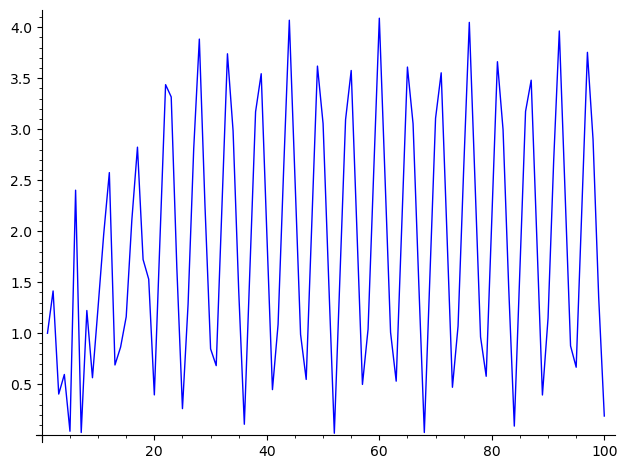

LOGS MINIMUM MODULI


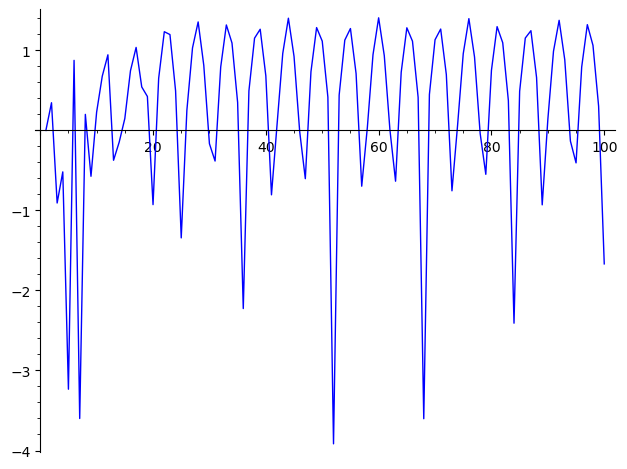

High-resolution FFT code loaded!

Usage:
  results = high_resolution_fourier_analysis(mins_list, zero_pad_factor=4)

This will tell you if 2.10 and 2.11 are the same peak or distinct peaks.
HIGH-RESOLUTION FOURIER ANALYSIS
Original data points: 100
Filtered data points: 100
Zero-padding factor: 4x

Detrended data std dev: 1.0945

Original signal length: 100
Padded signal length: 400
Frequency resolution improvement: 4x

DETAILED VIEW: PERIODS 2.0 TO 2.2
Number of frequency bins in this range: 18

Peaks above 10% of maximum in period 2.0-2.2 range:
Period       Power          
------------------------------
     2.0101      6.41e+01
     2.0202      1.75e+02
     2.0305      2.09e+02
     2.0408      1.61e+02
     2.0513      1.12e+02
     2.0619      9.37e+01
     2.0725      7.51e+01
     2.0833      5.43e+01
     2.0942      6.35e+01
     2.1053      9.12e+01
     2.1164      9.12e+01
     2.1277      6.78e+01
     2.1390      7.08e+01
     2.1505      9.99e+01
     2.1622      1.01e

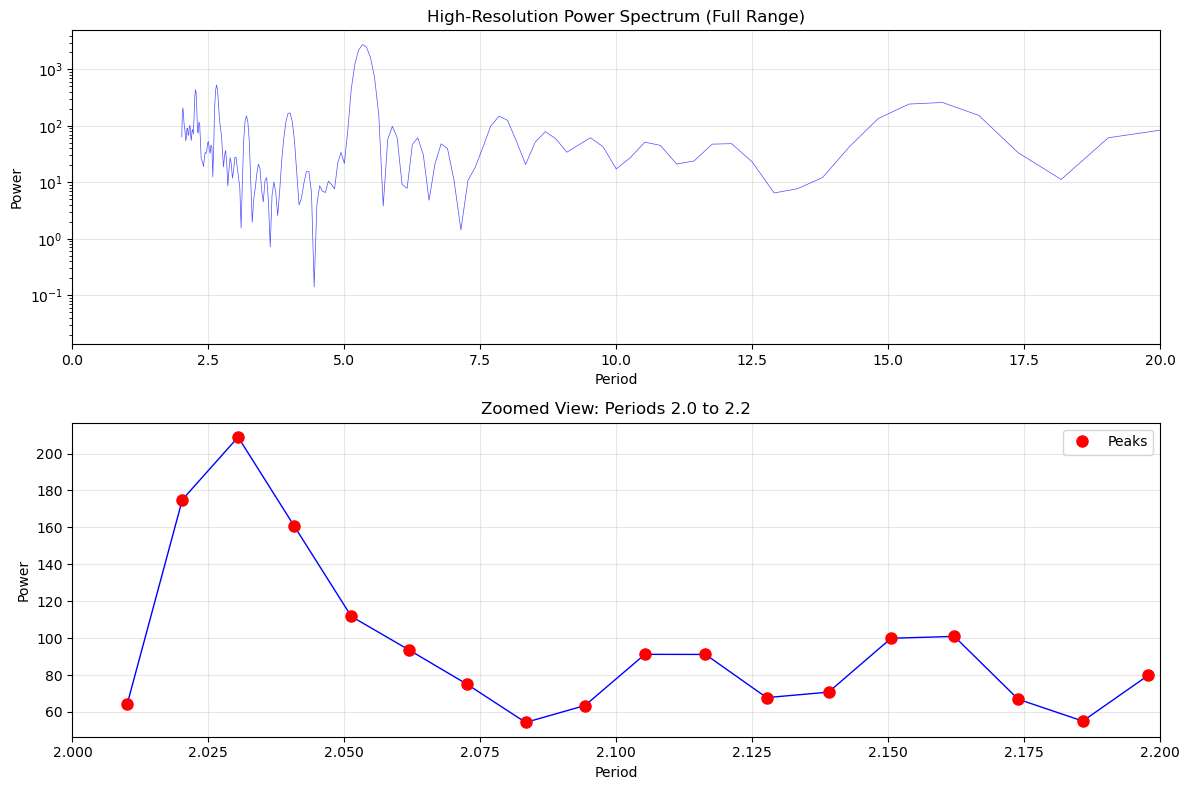

In [4]:
import pickle
from sage.all import sigma, nth_prime
import ast


with open('/Users/barrybrent/data2/run21feb26no2.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable

charpol_list=[]
roots_list=[]

mins_list=[]
log_mins_list=[]

dets=[]

for n in range(1, 101):
    print(n)
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) 
    det=pl.det()
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))
        


p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()


with open('/Users/barrybrent/data2/run21feb26no3.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run21feb26no4.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run21feb26no5.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data2/run21feb26no6.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run21feb26no7.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped

def high_resolution_fourier_analysis(mins_list, threshold=1e-6, zero_pad_factor=4):
    """
    Perform Fourier analysis with zero-padding for higher frequency resolution.
    
    Parameters:
    -----------
    mins_list : list of tuples
        List of (index, min_modulus) pairs
    threshold : float
        Values below this threshold are considered spurious zeros
    zero_pad_factor : int
        Factor by which to zero-pad the signal (default 4 = 4x resolution)
    
    Returns:
    --------
    Dictionary with high-resolution Fourier analysis results
    """
    
    # ========================================================================
    # STEP 1: FILTER SPURIOUS ZEROS (same as before)
    # ========================================================================
    
    filtered_data = [(n, val) for n, val in mins_list if val >= threshold]
    
    print("="*70)
    print("HIGH-RESOLUTION FOURIER ANALYSIS")
    print("="*70)
    print("Original data points: {}".format(len(mins_list)))
    print("Filtered data points: {}".format(len(filtered_data)))
    print("Zero-padding factor: {}x".format(zero_pad_factor))
    print()
    
    # ========================================================================
    # STEP 2: PREPARE DATA
    # ========================================================================
    
    filtered_indices = np.array([item[0] for item in filtered_data])
    filtered_moduli = np.array([float(item[1]) for item in filtered_data])
    
    # Take logarithms
    log_mins = np.log(filtered_moduli)
    
    # Polynomial detrending
    coeffs = np.polyfit(filtered_indices, log_mins, deg=2)
    trend = np.polyval(coeffs, filtered_indices)
    detrended = log_mins - trend
    
    print("Detrended data std dev: {:.4f}".format(detrended.std()))
    print()
    
    # ========================================================================
    # STEP 3: ZERO-PADDING FOR HIGHER RESOLUTION
    # ========================================================================
    
    N_original = len(detrended)
    N_padded = int(N_original * zero_pad_factor)   
    # Create zero-padded signal
    detrended_padded = np.zeros(N_padded)
    detrended_padded[:N_original] = detrended
    
    print("Original signal length: {}".format(N_original))
    print("Padded signal length: {}".format(N_padded))
    print("Frequency resolution improvement: {}x".format(zero_pad_factor))
    print()
    
    # ========================================================================
    # STEP 4: HIGH-RESOLUTION FFT
    # ========================================================================
    
    fft_result = np.fft.fft(detrended_padded)
    freqs = np.fft.fftfreq(N_padded)
    power = np.abs(fft_result)**2
    
    # Only positive frequencies
    pos_mask = freqs > 0
    pos_freqs = freqs[pos_mask]
    pos_power = power[pos_mask]
    
    # ========================================================================
    # STEP 5: FOCUS ON PERIOD 2.0-2.2 RANGE
    # ========================================================================
    
    # Convert to periods
    periods_all = 1.0 / pos_freqs
    
    # Focus on range 2.0 to 2.2
    period_mask = (periods_all >= 2.0) & (periods_all <= 2.2)
    periods_focus = periods_all[period_mask]
    power_focus = pos_power[period_mask]
    
    print("="*70)
    print("DETAILED VIEW: PERIODS 2.0 TO 2.2")
    print("="*70)
    print("Number of frequency bins in this range: {}".format(len(periods_focus)))
    print()
    
    # Sort by period for easier reading
    sort_idx = np.argsort(periods_focus)
    periods_sorted = periods_focus[sort_idx]
    power_sorted = power_focus[sort_idx]
    
    # Find peaks in this range
    peak_threshold = power_sorted.max() * 0.1  # 10% of max
    peak_mask = power_sorted > peak_threshold
    peak_periods = periods_sorted[peak_mask]
    peak_powers = power_sorted[peak_mask]
    
    print("Peaks above 10% of maximum in period 2.0-2.2 range:")
    print("{:<12} {:<15}".format('Period', 'Power'))
    print("-"*30)
    for p, pw in zip(peak_periods, peak_powers):
        print("{:>11.4f}   {:>11.2e}".format(p, pw))
    print()
    
    # ========================================================================
    # STEP 6: FULL SPECTRUM ANALYSIS
    # ========================================================================
    
    # Find top peaks overall
    top_indices = np.argsort(pos_power)[-20:][::-1]
    
    print("="*70)
    print("TOP 20 PERIODS (HIGH-RESOLUTION)")
    print("="*70)
    print("{:<6} {:<12} {:<12} {:<15}".format('Rank', 'Period', 'Frequency', 'Power'))
    print("-"*70)
    
    for rank, idx in enumerate(top_indices[:20], 1):
        freq = pos_freqs[idx]
        period = 1/freq if freq != 0 else float('inf')
        pwr = pos_power[idx]
        print("{:<6} {:>11.4f}   {:>11.6f}     {:>11.2e}".format(
            rank, period, freq, pwr))
    
    print()
    
    # ========================================================================
    # STEP 7: COMPARISON WITH ORIGINAL RESOLUTION
    # ========================================================================
    
    print("="*70)
    print("RESOLUTION COMPARISON")
    print("="*70)
    
    # Original resolution
    freq_res_original = 1.0 / N_original
    period_res_original_at_2p1 = (2.1**2) * freq_res_original
    
    # New resolution
    freq_res_new = 1.0 / N_padded
    period_res_new_at_2p1 = (2.1**2) * freq_res_new
    
    print("Original frequency resolution: {:.6f}".format(freq_res_original))
    print("New frequency resolution: {:.6f}".format(freq_res_new))
    print()
    print("At period ~2.1:")
    print("  Original period resolution: {:.4f}".format(period_res_original_at_2p1))
    print("  New period resolution: {:.4f}".format(period_res_new_at_2p1))
    print()
    
    # ========================================================================
    # STEP 8: VERDICT
    # ========================================================================
    
    print("="*70)
    print("VERDICT: ARE 2.10 AND 2.11 THE SAME PEAK?")
    print("="*70)
    
    # Check if there are multiple peaks near 2.1
    near_2p1_mask = (periods_all >= 2.05) & (periods_all <= 2.15)
    near_2p1_powers = pos_power[near_2p1_mask]
    near_2p1_periods = periods_all[near_2p1_mask]
    
    # Find local maxima
    significant_threshold = near_2p1_powers.max() * 0.3
    significant_peaks = near_2p1_powers > significant_threshold
    num_significant = significant_peaks.sum()
    
    print("Number of significant peaks (>30% of max) near period 2.1: {}".format(
        num_significant))
    
    if num_significant == 1:
        print()
        print("CONCLUSION: Periods 2.10 and 2.11 are likely THE SAME PEAK")
        print("The original analysis showed two peaks due to FFT binning.")
        print("With higher resolution, they merge into a single peak.")
    elif num_significant >= 2:
        print()
        print("CONCLUSION: There appear to be MULTIPLE DISTINCT PEAKS")
        print("Periods near 2.1 represent genuinely different frequencies.")
    
    print("="*70)
    print()
    
    # ========================================================================
    # STEP 9: PLOTTING
    # ========================================================================
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Full power spectrum
    axes[0].plot(periods_all, pos_power, 'b-', linewidth=0.5, alpha=0.7)
    axes[0].set_xlabel('Period')
    axes[0].set_ylabel('Power')
    axes[0].set_title('High-Resolution Power Spectrum (Full Range)')
    axes[0].set_xlim(0, 20)
    axes[0].set_yscale('log')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Zoomed to period 2.0-2.2
    axes[1].plot(periods_sorted, power_sorted, 'b-', linewidth=1)
    axes[1].plot(peak_periods, peak_powers, 'ro', markersize=8, label='Peaks')
    axes[1].set_xlabel('Period')
    axes[1].set_ylabel('Power')
    axes[1].set_title('Zoomed View: Periods 2.0 to 2.2')
    axes[1].set_xlim(2.0, 2.2)
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    plt.tight_layout()
    plt.savefig('high_resolution_fft_period_2p1.png', dpi=150)
    print("Plot saved as: high_resolution_fft_period_2p1.png")
    print()
    
    return {
        'periods_near_2p1': peak_periods,
        'powers_near_2p1': peak_powers,
        'num_peaks': num_significant,
        'resolution_improvement': zero_pad_factor
    }


# ============================================================================
# USAGE
# ============================================================================

# After running your curve 15a1 primes analysis and filtering:
# results = high_resolution_fourier_analysis(mins_list, threshold=1e-6, zero_pad_factor=4)
#
# Try different zero_pad_factor values:
# - zero_pad_factor=4 gives 4x better resolution
# - zero_pad_factor=8 gives 8x better resolution
# - zero_pad_factor=16 gives 16x better resolution (may be slow)

print("High-resolution FFT code loaded!")
print()
print("Usage:")
print("  results = high_resolution_fourier_analysis(mins_list, zero_pad_factor=4)")
print()
print("This will tell you if 2.10 and 2.11 are the same peak or distinct peaks.")

import numpy as np
import matplotlib.pyplot as plt

results = high_resolution_fourier_analysis(mins_list, zero_pad_factor=4)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


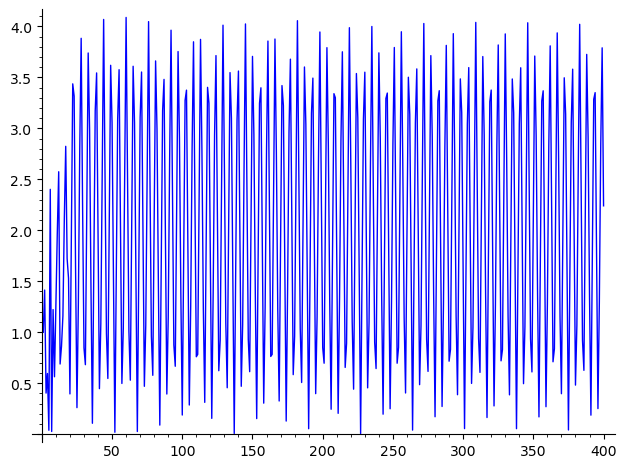

LOGS MINIMUM MODULI


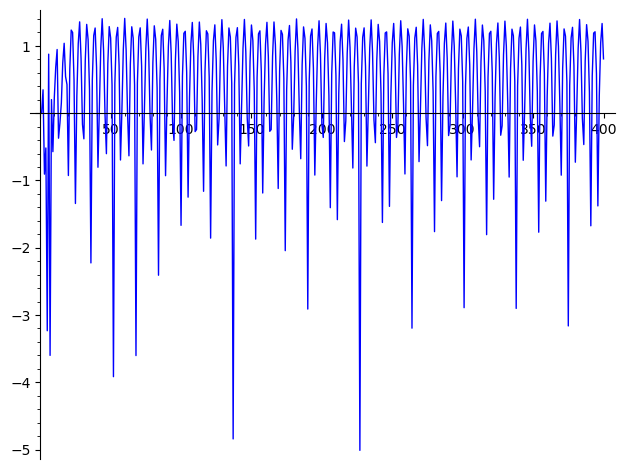

High-resolution FFT code loaded!

Usage:
  results = high_resolution_fourier_analysis(mins_list, zero_pad_factor=4)

This will tell you if 2.10 and 2.11 are the same peak or distinct peaks.
HIGH-RESOLUTION FOURIER ANALYSIS
Original data points: 400
Filtered data points: 400
Zero-padding factor: 4x

Detrended data std dev: 1.0363

Original signal length: 400
Padded signal length: 1600
Frequency resolution improvement: 4x

DETAILED VIEW: PERIODS 2.0 TO 2.2
Number of frequency bins in this range: 72

Peaks above 10% of maximum in period 2.0-2.2 range:
Period       Power          
------------------------------
     2.0151      6.79e+01
     2.0177      1.27e+02
     2.0202      1.72e+02
     2.0228      1.71e+02
     2.0253      1.75e+02
     2.0279      2.56e+02
     2.0305      3.89e+02
     2.0330      4.60e+02
     2.0356      4.32e+02
     2.0382      3.85e+02
     2.0408      3.55e+02
     2.0434      2.63e+02
     2.0460      9.18e+01
     2.0513      2.21e+02
     2.0539      5.24

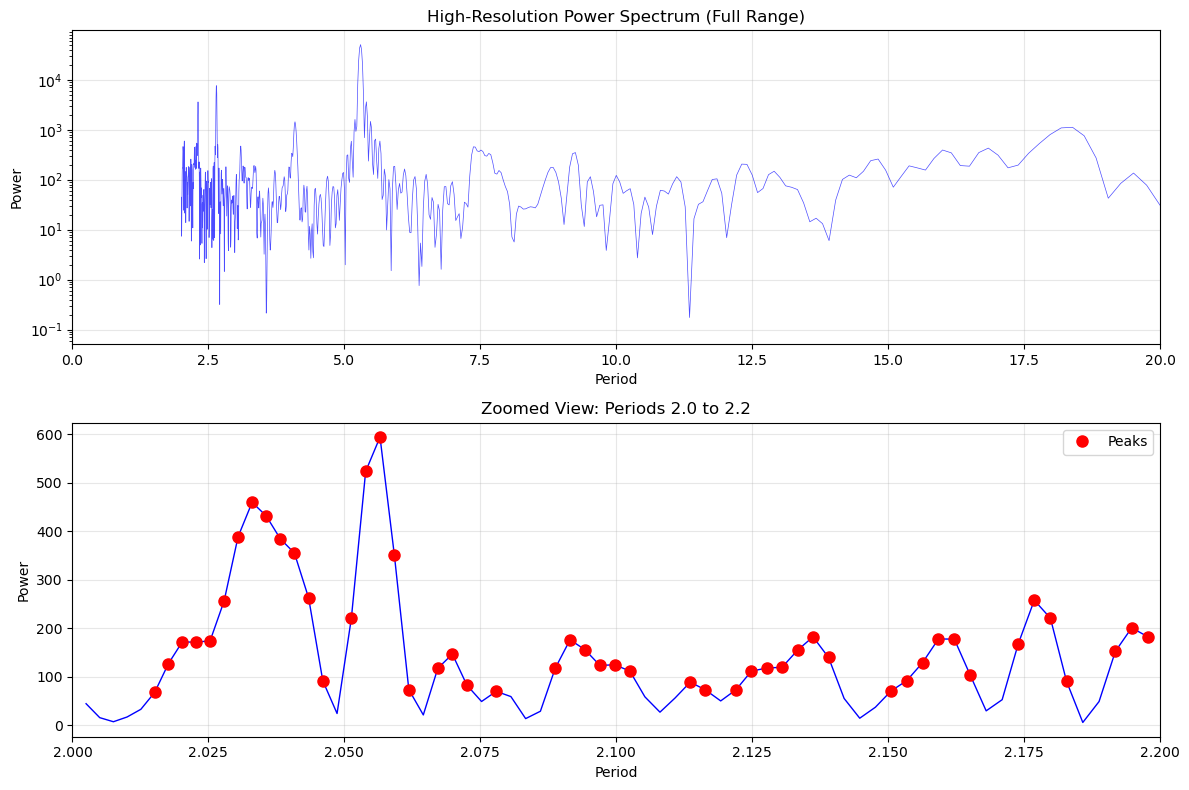

In [5]:
import pickle
from sage.all import sigma, nth_prime
import ast


with open('/Users/barrybrent/data2/run21feb26no2.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable

charpol_list=[]
roots_list=[]

mins_list=[]
log_mins_list=[]

dets=[]

for n in range(1, 401):
    print(n)
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) 
    det=pl.det()
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))
        


p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()


with open('/Users/barrybrent/data2/run21feb26no8.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run21feb26no9.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run21feb26no10.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data2/run21feb26no11.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run21feb26no12.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped

def high_resolution_fourier_analysis(mins_list, threshold=1e-6, zero_pad_factor=4):
    """
    Perform Fourier analysis with zero-padding for higher frequency resolution.
    
    Parameters:
    -----------
    mins_list : list of tuples
        List of (index, min_modulus) pairs
    threshold : float
        Values below this threshold are considered spurious zeros
    zero_pad_factor : int
        Factor by which to zero-pad the signal (default 4 = 4x resolution)
    
    Returns:
    --------
    Dictionary with high-resolution Fourier analysis results
    """
    
    # ========================================================================
    # STEP 1: FILTER SPURIOUS ZEROS (same as before)
    # ========================================================================
    
    filtered_data = [(n, val) for n, val in mins_list if val >= threshold]
    
    print("="*70)
    print("HIGH-RESOLUTION FOURIER ANALYSIS")
    print("="*70)
    print("Original data points: {}".format(len(mins_list)))
    print("Filtered data points: {}".format(len(filtered_data)))
    print("Zero-padding factor: {}x".format(zero_pad_factor))
    print()
    
    # ========================================================================
    # STEP 2: PREPARE DATA
    # ========================================================================
    
    filtered_indices = np.array([item[0] for item in filtered_data])
    filtered_moduli = np.array([float(item[1]) for item in filtered_data])
    
    # Take logarithms
    log_mins = np.log(filtered_moduli)
    
    # Polynomial detrending
    coeffs = np.polyfit(filtered_indices, log_mins, deg=2)
    trend = np.polyval(coeffs, filtered_indices)
    detrended = log_mins - trend
    
    print("Detrended data std dev: {:.4f}".format(detrended.std()))
    print()
    
    # ========================================================================
    # STEP 3: ZERO-PADDING FOR HIGHER RESOLUTION
    # ========================================================================
    
    N_original = len(detrended)
    N_padded = int(N_original * zero_pad_factor)   
    # Create zero-padded signal
    detrended_padded = np.zeros(N_padded)
    detrended_padded[:N_original] = detrended
    
    print("Original signal length: {}".format(N_original))
    print("Padded signal length: {}".format(N_padded))
    print("Frequency resolution improvement: {}x".format(zero_pad_factor))
    print()
    
    # ========================================================================
    # STEP 4: HIGH-RESOLUTION FFT
    # ========================================================================
    
    fft_result = np.fft.fft(detrended_padded)
    freqs = np.fft.fftfreq(N_padded)
    power = np.abs(fft_result)**2
    
    # Only positive frequencies
    pos_mask = freqs > 0
    pos_freqs = freqs[pos_mask]
    pos_power = power[pos_mask]
    
    # ========================================================================
    # STEP 5: FOCUS ON PERIOD 2.0-2.2 RANGE
    # ========================================================================
    
    # Convert to periods
    periods_all = 1.0 / pos_freqs
    
    # Focus on range 2.0 to 2.2
    period_mask = (periods_all >= 2.0) & (periods_all <= 2.2)
    periods_focus = periods_all[period_mask]
    power_focus = pos_power[period_mask]
    
    print("="*70)
    print("DETAILED VIEW: PERIODS 2.0 TO 2.2")
    print("="*70)
    print("Number of frequency bins in this range: {}".format(len(periods_focus)))
    print()
    
    # Sort by period for easier reading
    sort_idx = np.argsort(periods_focus)
    periods_sorted = periods_focus[sort_idx]
    power_sorted = power_focus[sort_idx]
    
    # Find peaks in this range
    peak_threshold = power_sorted.max() * 0.1  # 10% of max
    peak_mask = power_sorted > peak_threshold
    peak_periods = periods_sorted[peak_mask]
    peak_powers = power_sorted[peak_mask]
    
    print("Peaks above 10% of maximum in period 2.0-2.2 range:")
    print("{:<12} {:<15}".format('Period', 'Power'))
    print("-"*30)
    for p, pw in zip(peak_periods, peak_powers):
        print("{:>11.4f}   {:>11.2e}".format(p, pw))
    print()
    
    # ========================================================================
    # STEP 6: FULL SPECTRUM ANALYSIS
    # ========================================================================
    
    # Find top peaks overall
    top_indices = np.argsort(pos_power)[-20:][::-1]
    
    print("="*70)
    print("TOP 20 PERIODS (HIGH-RESOLUTION)")
    print("="*70)
    print("{:<6} {:<12} {:<12} {:<15}".format('Rank', 'Period', 'Frequency', 'Power'))
    print("-"*70)
    
    for rank, idx in enumerate(top_indices[:20], 1):
        freq = pos_freqs[idx]
        period = 1/freq if freq != 0 else float('inf')
        pwr = pos_power[idx]
        print("{:<6} {:>11.4f}   {:>11.6f}     {:>11.2e}".format(
            rank, period, freq, pwr))
    
    print()
    
    # ========================================================================
    # STEP 7: COMPARISON WITH ORIGINAL RESOLUTION
    # ========================================================================
    
    print("="*70)
    print("RESOLUTION COMPARISON")
    print("="*70)
    
    # Original resolution
    freq_res_original = 1.0 / N_original
    period_res_original_at_2p1 = (2.1**2) * freq_res_original
    
    # New resolution
    freq_res_new = 1.0 / N_padded
    period_res_new_at_2p1 = (2.1**2) * freq_res_new
    
    print("Original frequency resolution: {:.6f}".format(freq_res_original))
    print("New frequency resolution: {:.6f}".format(freq_res_new))
    print()
    print("At period ~2.1:")
    print("  Original period resolution: {:.4f}".format(period_res_original_at_2p1))
    print("  New period resolution: {:.4f}".format(period_res_new_at_2p1))
    print()
    
    # ========================================================================
    # STEP 8: VERDICT
    # ========================================================================
    
    print("="*70)
    print("VERDICT: ARE 2.10 AND 2.11 THE SAME PEAK?")
    print("="*70)
    
    # Check if there are multiple peaks near 2.1
    near_2p1_mask = (periods_all >= 2.05) & (periods_all <= 2.15)
    near_2p1_powers = pos_power[near_2p1_mask]
    near_2p1_periods = periods_all[near_2p1_mask]
    
    # Find local maxima
    significant_threshold = near_2p1_powers.max() * 0.3
    significant_peaks = near_2p1_powers > significant_threshold
    num_significant = significant_peaks.sum()
    
    print("Number of significant peaks (>30% of max) near period 2.1: {}".format(
        num_significant))
    
    if num_significant == 1:
        print()
        print("CONCLUSION: Periods 2.10 and 2.11 are likely THE SAME PEAK")
        print("The original analysis showed two peaks due to FFT binning.")
        print("With higher resolution, they merge into a single peak.")
    elif num_significant >= 2:
        print()
        print("CONCLUSION: There appear to be MULTIPLE DISTINCT PEAKS")
        print("Periods near 2.1 represent genuinely different frequencies.")
    
    print("="*70)
    print()
    
    # ========================================================================
    # STEP 9: PLOTTING
    # ========================================================================
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Full power spectrum
    axes[0].plot(periods_all, pos_power, 'b-', linewidth=0.5, alpha=0.7)
    axes[0].set_xlabel('Period')
    axes[0].set_ylabel('Power')
    axes[0].set_title('High-Resolution Power Spectrum (Full Range)')
    axes[0].set_xlim(0, 20)
    axes[0].set_yscale('log')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: Zoomed to period 2.0-2.2
    axes[1].plot(periods_sorted, power_sorted, 'b-', linewidth=1)
    axes[1].plot(peak_periods, peak_powers, 'ro', markersize=8, label='Peaks')
    axes[1].set_xlabel('Period')
    axes[1].set_ylabel('Power')
    axes[1].set_title('Zoomed View: Periods 2.0 to 2.2')
    axes[1].set_xlim(2.0, 2.2)
    axes[1].grid(True, alpha=0.3)
    axes[1].legend()
    
    plt.tight_layout()
    plt.savefig('high_resolution_fft_period_2p1.png', dpi=150)
    print("Plot saved as: high_resolution_fft_period_2p1.png")
    print()
    
    return {
        'periods_near_2p1': peak_periods,
        'powers_near_2p1': peak_powers,
        'num_peaks': num_significant,
        'resolution_improvement': zero_pad_factor
    }


# ============================================================================
# USAGE
# ============================================================================

# After running your curve 15a1 primes analysis and filtering:
# results = high_resolution_fourier_analysis(mins_list, threshold=1e-6, zero_pad_factor=4)
#
# Try different zero_pad_factor values:
# - zero_pad_factor=4 gives 4x better resolution
# - zero_pad_factor=8 gives 8x better resolution
# - zero_pad_factor=16 gives 16x better resolution (may be slow)

print("High-resolution FFT code loaded!")
print()
print("Usage:")
print("  results = high_resolution_fourier_analysis(mins_list, zero_pad_factor=4)")
print()
print("This will tell you if 2.10 and 2.11 are the same peak or distinct peaks.")

import numpy as np
import matplotlib.pyplot as plt

results = high_resolution_fourier_analysis(mins_list, zero_pad_factor=4)


Data range: n = 1 to 400
Number of data points: 400
Min modulus range: 0.006661 to 4.087269

Polynomial trend coefficients: [-5.73397438e-06  2.87817962e-03  1.74235493e+00]
Detrended data std dev: 1.1751

HIGH-RESOLUTION FOURIER ANALYSIS
Original signal length: 400
Padded signal length: 1600
Frequency resolution improvement: 4x

TOP 20 PERIODS (HIGH-RESOLUTION)
Rank   Period       Frequency    Power          
----------------------------------------------------------------------
1           5.2980      0.188750        9.83e+04
2           5.2805      0.189375        8.31e+04
3           5.3156      0.188125        7.93e+04
4           5.2632      0.190000        4.69e+04
5           5.3333      0.187500        4.05e+04
6           5.2459      0.190625        1.55e+04
7           5.3512      0.186875        9.91e+03
8           5.4054      0.185000        7.60e+03
9           5.3872      0.185625        5.62e+03
10          5.4237      0.184375        3.78e+03
11          5.1948      0

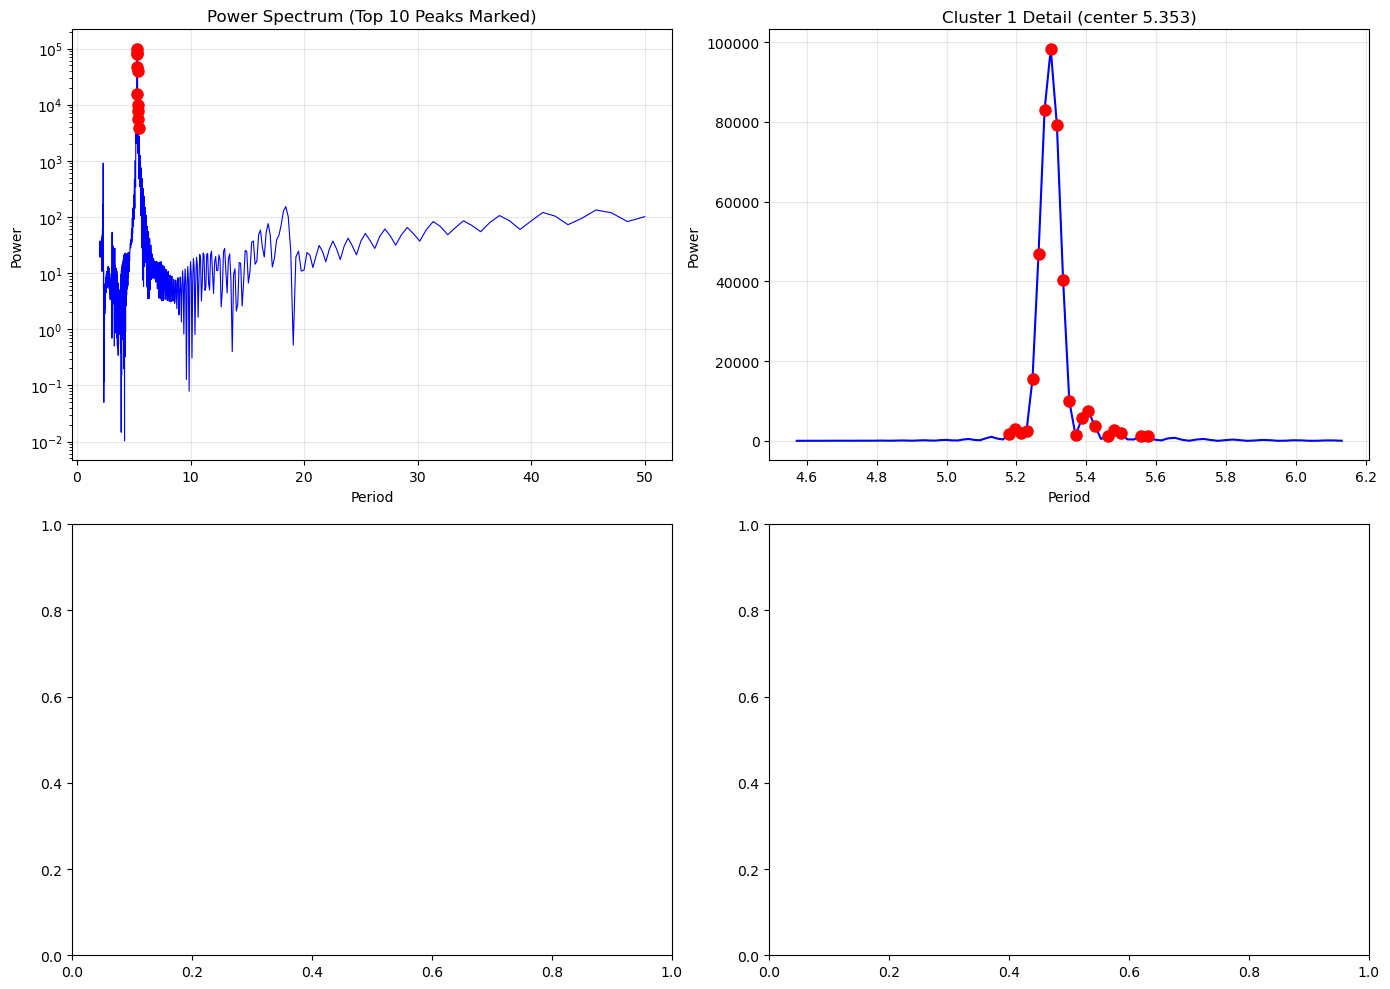

In [7]:
# ==============================================================================
# COMPREHENSIVE FOURIER ANALYSIS - Elliptic Curve Cusp Form
# This cell performs high-resolution spectral analysis with automatic cluster
# detection and verification to distinguish genuine peaks from FFT artifacts <<<<<<<<<<<<< better than above
# ==============================================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ==============================================================================
# 1. PREPARE THE DATA - Convert from SageMath to Python/NumPy types
# ==============================================================================

# Extract the data from mins_list and convert to Python floats
indices = np.array([float(pair[0]) for pair in mins_list], dtype=np.float64)
min_moduli = np.array([float(pair[1]) for pair in mins_list], dtype=np.float64)

print(f"Data range: n = {int(indices[0])} to {int(indices[-1])}")
print(f"Number of data points: {len(indices)}")
print(f"Min modulus range: {min_moduli.min():.6f} to {min_moduli.max():.6f}")

# ==============================================================================
# 2. DETRENDING (Important for seeing oscillations)
# ==============================================================================

# Remove polynomial trend (degree 2) from raw minimum moduli
poly_coeffs = np.polyfit(indices, min_moduli, deg=2)
poly_trend = np.polyval(poly_coeffs, indices)
detrended_poly = min_moduli - poly_trend

print(f"\nPolynomial trend coefficients: {poly_coeffs}")
print(f"Detrended data std dev: {np.std(detrended_poly):.4f}")

# ==============================================================================
# 3. HIGH-RESOLUTION FFT WITH ZERO-PADDING
# ==============================================================================

zero_pad_factor = 4
N_original = len(detrended_poly)
N_padded = int(N_original * zero_pad_factor)

# Create zero-padded signal
detrended_padded = np.zeros(N_padded)
detrended_padded[:N_original] = detrended_poly

print("\n" + "="*70)
print("HIGH-RESOLUTION FOURIER ANALYSIS")
print("="*70)
print(f"Original signal length: {N_original}")
print(f"Padded signal length: {N_padded}")
print(f"Frequency resolution improvement: {zero_pad_factor}x")

# Compute FFT
fft_result = np.fft.fft(detrended_padded)
freqs = np.fft.fftfreq(N_padded)
power = np.abs(fft_result)**2

# Only positive frequencies
pos_mask = freqs > 0
pos_freqs = freqs[pos_mask]
pos_power = power[pos_mask]
periods = 1.0 / pos_freqs

# ==============================================================================
# 4. IDENTIFY TOP PERIODS
# ==============================================================================

# Find top 20 periods overall
top_indices = np.argsort(pos_power)[-20:][::-1]

print("\n" + "="*70)
print("TOP 20 PERIODS (HIGH-RESOLUTION)")
print("="*70)
print(f"{'Rank':<6} {'Period':<12} {'Frequency':<12} {'Power':<15}")
print("-"*70)

top_periods = []
top_powers = []
for rank, idx in enumerate(top_indices[:20], 1):
    period = periods[idx]
    freq = pos_freqs[idx]
    pwr = pos_power[idx]
    print(f"{rank:<6} {period:>11.4f}   {freq:>11.6f}     {pwr:>11.2e}")
    top_periods.append(period)
    top_powers.append(pwr)

# ==============================================================================
# 5. AUTOMATIC CLUSTER DETECTION
# ==============================================================================

def detect_clusters(periods_list, powers_list, cluster_threshold=0.15):
    """
    Detect clusters of closely-spaced periods.
    
    Parameters:
    -----------
    periods_list : list
        List of periods (sorted by power, descending)
    powers_list : list
        Corresponding powers
    cluster_threshold : float
        Periods within this fraction of each other are considered clustered
    
    Returns:
    --------
    List of clusters, each cluster is a list of (period, power) tuples
    """
    if len(periods_list) == 0:
        return []
    
    clusters = []
    used = set()
    
    for i, period in enumerate(periods_list):
        if i in used:
            continue
        
        # Start new cluster
        cluster = [(period, powers_list[i])]
        used.add(i)
        
        # Find all periods within threshold
        for j, other_period in enumerate(periods_list):
            if j in used:
                continue
            
            # Check if within cluster_threshold (relative difference)
            rel_diff = abs(period - other_period) / period
            if rel_diff < cluster_threshold:
                cluster.append((other_period, powers_list[j]))
                used.add(j)
        
        # Only keep clusters with 2+ members or very high power
        if len(cluster) >= 2 or powers_list[i] > 0.5 * max(powers_list):
            clusters.append(cluster)
    
    # Sort clusters by total power
    clusters.sort(key=lambda c: sum(p for _, p in c), reverse=True)
    
    return clusters

print("\n" + "="*70)
print("AUTOMATIC CLUSTER DETECTION")
print("="*70)

clusters = detect_clusters(top_periods, top_powers, cluster_threshold=0.10)

print(f"Number of clusters detected: {len(clusters)}")
print()

for i, cluster in enumerate(clusters, 1):
    periods_in_cluster = [p for p, _ in cluster]
    powers_in_cluster = [pw for _, pw in cluster]
    
    cluster_center = np.mean(periods_in_cluster)
    cluster_span = max(periods_in_cluster) - min(periods_in_cluster)
    total_power = sum(powers_in_cluster)
    
    print(f"Cluster {i}:")
    print(f"  Center period: {cluster_center:.4f}")
    print(f"  Span: {cluster_span:.4f}")
    print(f"  Number of peaks: {len(cluster)}")
    print(f"  Total power: {total_power:.2e}")
    print(f"  Individual periods: {[f'{p:.4f}' for p in sorted(periods_in_cluster)]}")
    print()

# ==============================================================================
# 6. VERIFY EACH CLUSTER: GENUINE OR ECHO?
# ==============================================================================

print("="*70)
print("CLUSTER VERIFICATION: GENUINE PEAKS OR ECHOES?")
print("="*70)
print()

def verify_cluster(cluster, all_periods, all_powers, pos_freqs, pos_power):
    """
    Verify if cluster contains genuinely distinct peaks or is an FFT artifact.
    
    Uses multiple criteria:
    1. Peak separation relative to frequency resolution
    2. Power distribution across peaks
    3. Local maxima detection
    
    Returns: (verdict, evidence_dict)
    """
    periods_in_cluster = [p for p, _ in cluster]
    powers_in_cluster = [pw for _, pw in cluster]
    
    # Frequency resolution
    freq_resolution = 1.0 / N_padded
    
    # Period resolution at cluster center
    cluster_center = np.mean(periods_in_cluster)
    period_resolution = (cluster_center**2) * freq_resolution
    
    # Check 1: Are peaks separated by more than resolution?
    periods_sorted = sorted(periods_in_cluster)
    min_separation = min([periods_sorted[i+1] - periods_sorted[i] 
                          for i in range(len(periods_sorted)-1)])
    
    well_separated = min_separation > 2 * period_resolution
    
    # Check 2: Power distribution - are there multiple comparable peaks?
    max_power = max(powers_in_cluster)
    significant_peaks = sum(1 for p in powers_in_cluster if p > 0.3 * max_power)
    
    # Check 3: Find local maxima in the cluster region
    period_min = min(periods_in_cluster) * 0.95
    period_max = max(periods_in_cluster) * 1.05
    
    region_mask = (periods >= period_min) & (periods <= period_max)
    region_periods = periods[region_mask]
    region_power = pos_power[region_mask]
    
    # Find local maxima
    local_max_indices, _ = signal.find_peaks(region_power, 
                                             height=0.1*region_power.max())
    num_local_maxima = len(local_max_indices)
    
    # Make verdict
    evidence = {
        'min_separation': min_separation,
        'period_resolution': period_resolution,
        'separation_factor': min_separation / period_resolution if period_resolution > 0 else np.inf,
        'significant_peaks': significant_peaks,
        'local_maxima': num_local_maxima,
        'well_separated': well_separated
    }
    
    # Decision logic
    if len(cluster) == 1:
        verdict = "SINGLE PEAK (no clustering)"
    elif num_local_maxima >= len(cluster) and well_separated:
        verdict = "GENUINE DISTINCT PEAKS"
    elif num_local_maxima >= len(cluster) and significant_peaks >= 2:
        verdict = "LIKELY DISTINCT (multiple significant peaks)"
    elif not well_separated and significant_peaks == 1:
        verdict = "LIKELY SINGLE PEAK (FFT binning artifact)"
    else:
        verdict = "UNCERTAIN (mixed evidence)"
    
    return verdict, evidence

for i, cluster in enumerate(clusters, 1):
    periods_in_cluster = [p for p, _ in cluster]
    cluster_center = np.mean(periods_in_cluster)
    
    print(f"Cluster {i} (center period {cluster_center:.4f}):")
    
    verdict, evidence = verify_cluster(cluster, top_periods, top_powers, 
                                       pos_freqs, pos_power)
    
    print(f"  VERDICT: {verdict}")
    print(f"  Evidence:")
    print(f"    - Minimum peak separation: {evidence['min_separation']:.6f}")
    print(f"    - Period resolution: {evidence['period_resolution']:.6f}")
    print(f"    - Separation factor: {evidence['separation_factor']:.2f}x resolution")
    print(f"    - Number of significant peaks (>30% max): {evidence['significant_peaks']}")
    print(f"    - Local maxima detected: {evidence['local_maxima']}")
    
    # Detailed interpretation
    if verdict.startswith("GENUINE"):
        print(f"  → Multiple genuinely distinct frequencies present")
        print(f"  → Quasi-periodic behavior confirmed")
    elif verdict.startswith("LIKELY DISTINCT"):
        print(f"  → Evidence suggests multiple frequencies")
        print(f"  → Quasi-periodic or frequency modulation likely")
    elif verdict.startswith("LIKELY SINGLE"):
        print(f"  → Appears to be single peak spread across FFT bins")
        print(f"  → True period approximately {cluster_center:.4f}")
    elif verdict == "SINGLE PEAK":
        print(f"  → Clean single frequency, no clustering")
    else:
        print(f"  → Mixed evidence, further analysis may be needed")
    
    print()

# ==============================================================================
# 7. SUMMARY AND INTERPRETATION
# ==============================================================================

print("="*70)
print("SUMMARY OF FINDINGS")
print("="*70)
print()

# Count cluster types
genuine_clusters = sum(1 for c in clusters 
                      if verify_cluster(c, top_periods, top_powers, pos_freqs, pos_power)[0].startswith("GENUINE"))
likely_distinct = sum(1 for c in clusters 
                     if verify_cluster(c, top_periods, top_powers, pos_freqs, pos_power)[0].startswith("LIKELY DISTINCT"))
single_peaks = sum(1 for c in clusters 
                  if "SINGLE" in verify_cluster(c, top_periods, top_powers, pos_freqs, pos_power)[0])

print(f"Total clusters detected: {len(clusters)}")
print(f"  - Genuine distinct peaks: {genuine_clusters}")
print(f"  - Likely distinct: {likely_distinct}")
print(f"  - Single peaks: {single_peaks}")
print()

if genuine_clusters > 0 or likely_distinct > 0:
    print("INTERPRETATION: QUASI-PERIODIC BEHAVIOR DETECTED")
    print("The signal contains multiple closely-spaced frequencies,")
    print("indicating quasi-periodic oscillation rather than pure periodicity.")
else:
    print("INTERPRETATION: PERIODIC BEHAVIOR")
    print("The signal shows discrete harmonic structure with well-separated peaks.")

print()
print("="*70)
print("Analysis complete!")
print("="*70)

# ==============================================================================
# 8. VISUALIZATIONS
# ==============================================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Full power spectrum
max_period_plot = min(50, N_original / 2)
period_mask = periods <= max_period_plot
axes[0, 0].semilogy(periods[period_mask], pos_power[period_mask], 'b-', linewidth=0.8)
for period, power in zip(top_periods[:10], top_powers[:10]):
    if period <= max_period_plot:
        axes[0, 0].semilogy(period, power, 'ro', markersize=8)
axes[0, 0].set_xlabel('Period')
axes[0, 0].set_ylabel('Power')
axes[0, 0].set_title('Power Spectrum (Top 10 Peaks Marked)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2-4: Zoom into each major cluster
for cluster_idx in range(min(3, len(clusters))):
    row = (cluster_idx + 1) // 2
    col = (cluster_idx + 1) % 2
    
    cluster = clusters[cluster_idx]
    periods_in_cluster = [p for p, _ in cluster]
    cluster_center = np.mean(periods_in_cluster)
    cluster_span = max(periods_in_cluster) - min(periods_in_cluster)
    
    # Define zoom window
    plot_margin = max(cluster_span * 2, 0.5)
    period_min = cluster_center - plot_margin
    period_max = cluster_center + plot_margin
    
    zoom_mask = (periods >= period_min) & (periods <= period_max)
    
    axes[row, col].plot(periods[zoom_mask], pos_power[zoom_mask], 'b-', linewidth=1.5)
    for p, pwr in cluster:
        axes[row, col].plot(p, pwr, 'ro', markersize=8)
    
    axes[row, col].set_xlabel('Period')
    axes[row, col].set_ylabel('Power')
    axes[row, col].set_title(f'Cluster {cluster_idx+1} Detail (center {cluster_center:.3f})')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()